In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from astropy.io import fits
import sys
from helita.io import lp
from scipy.io.idl import readsav
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import cm
import sunpy.cm as cmaps
from sklearn.impute import SimpleImputer
import h5py
from matplotlib.path import Path
from matplotlib.image import NonUniformImage
from tqdm import tqdm
import cmasher as cmr
from matplotlib.path import Path
import matplotlib.colors as colors

In [2]:
dpath_energy = '/mn/stornext/d9/souvikb/High_impact/'
dpath_simulation ='/mn/stornext/d5/juanms/mpi3druns/2Druns/genohm/rain/l2d90x40rvk/sim_data_rh_it=280-369.hdf5'

In [3]:
energy = h5py.File(dpath_energy+'spicule_energy_it=280-369.hdf5', 'r')
e = energy['e']
input_sim = h5py.File(dpath_simulation,'r')
temp_juan=input_sim['temperature']
vel_juan=input_sim['velocity_z']
z    = input_sim['z']#Height (m)
x    = input_sim['x']#Spatial [m]
y    = input_sim['y']# time []

In [4]:
#Heating terms
Q = h5py.File(dpath_energy+'spicule_qterms_it=280-369.hdf5','r')
Qjamb = Q['qjamb']
Qgenrad =Q['qgenrad']
Qjoule = Q['qjoule']
Qpdv =Q['qpdv']
Qspitz=Q['qspitz']
Qvisc =Q['qvisc']

In [5]:
rho = h5py.File(dpath_energy+'density_it=280-369.hdf5', 'r')
p = rho['rho']
p.shape

(6930, 90, 1554)

In [6]:
#Reading the X (Mm), Z (Mm) and Y (sec) information from the simulation
z1 = z[0,:]/1e6
x_extent = x[4320:5759]/1e6
#extend = (x1.min(),x1.max(),z1.max(),z1.min())
x2 = y[:]*10 -y[0]*10
extend1 = (x2.min(),x2.max(),z1.max(),z1.min())
# x_pos1=4865-4176
# x_pos2=4980-4176
print(e.shape)

(6930, 90, 1554)


/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  """


Text(0.5, 1.0, 'Qjamb')

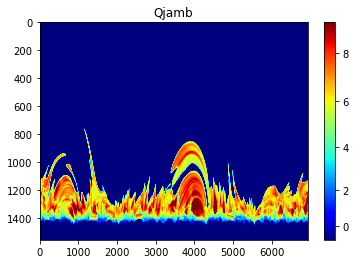

In [8]:
scan=37
heat = (1e-20+Qjamb[:,scan,:])*1e3
den = (1e-20+p[:,scan,:])*1e-7
amb_part = heat/den
plt.imshow(np.log10(np.abs(amb_part).T),cmap='jet',vmin=-1,vmax=9.2,norm=colors.PowerNorm(gamma=1.2),aspect='auto')
plt.colorbar()
plt.title('Qjamb')

  0%|          | 0/1 [00:00<?, ?it/s]/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  
100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


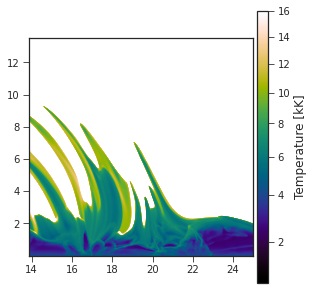

In [52]:
plt.style.use('seaborn-ticks')
for scan in tqdm(range(1)):
    #scan=15
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
#    axs = axs.ravel()
    im1 = ax.imshow((temp_juan[0,1000:1800,scan,500:1410].T)/1e3,cmap=cmr.rainforest,vmax=1.6e4/1e3,vmin=1,norm=colors.PowerNorm(gamma=0.7),aspect=0.8,extent=[x[1000]/1e6,x[1800]/1e6,z1[1410],z1[500]])
    divider = make_axes_locatable(ax)
    cax0 = divider.append_axes("right", size="5%", pad=0.05)
    cbar=plt.colorbar(im1,cax=cax0)
    cbar.set_label('Temperature [kK]',size=12)


  0%|          | 0/90 [00:00<?, ?it/s]/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  after removing the cwd from sys.path.
/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_innches" which is no longer supported as of 3.3 and will become an error two minor releases later
  # This is added back by InteractiveShellApp.init_path()

 22%|██▏       | 20/90 [00:42<02:27,  2.11s/it]/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

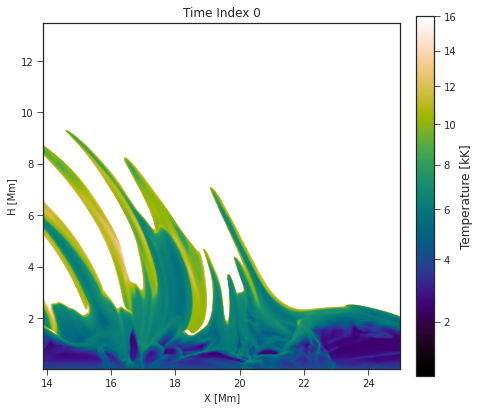

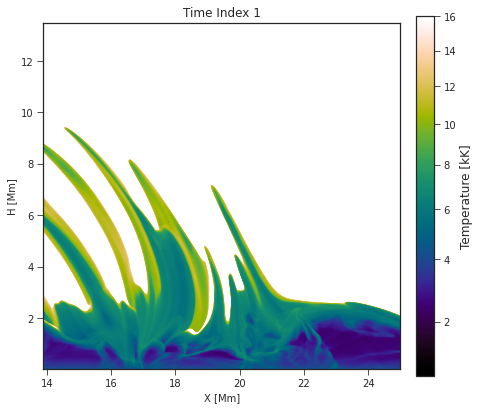

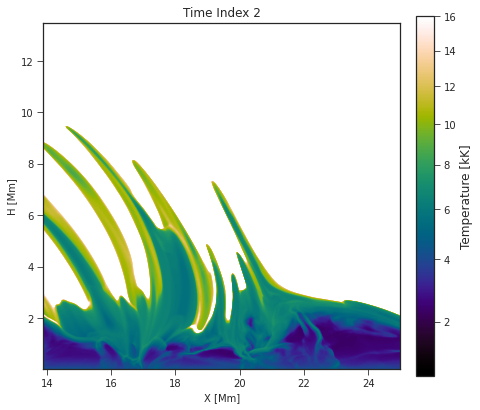

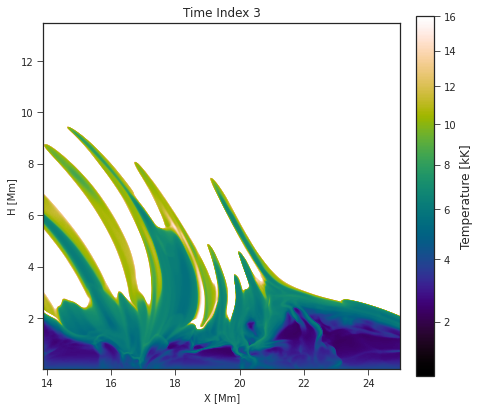

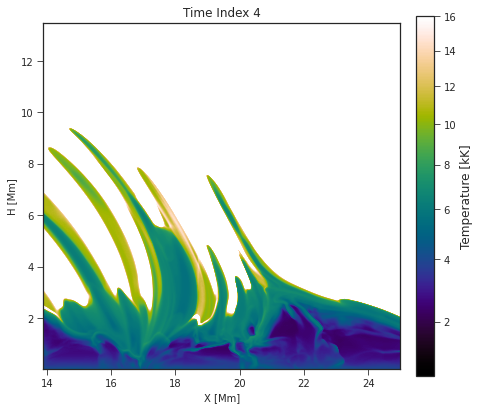

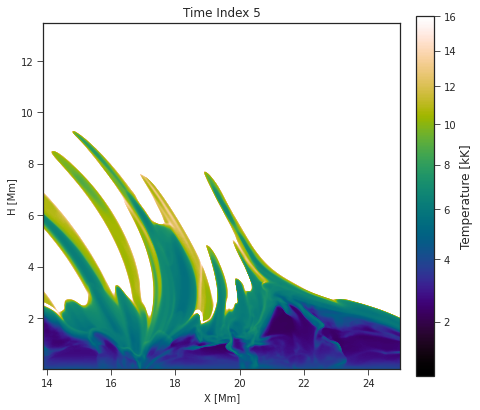

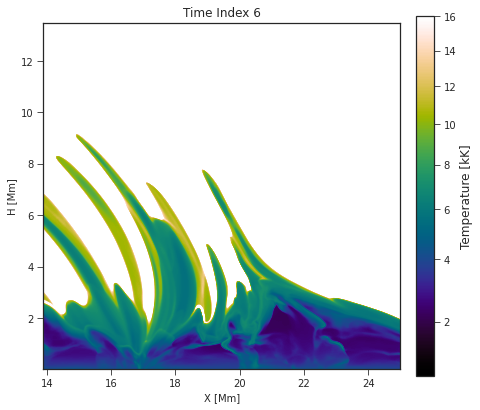

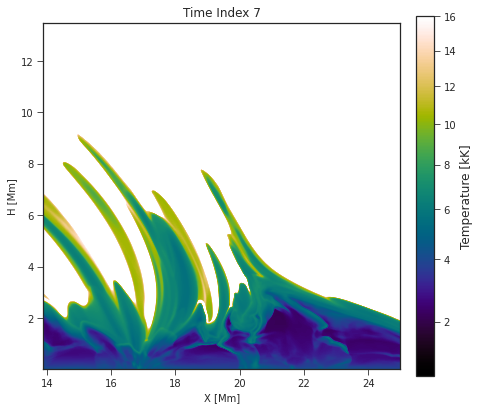

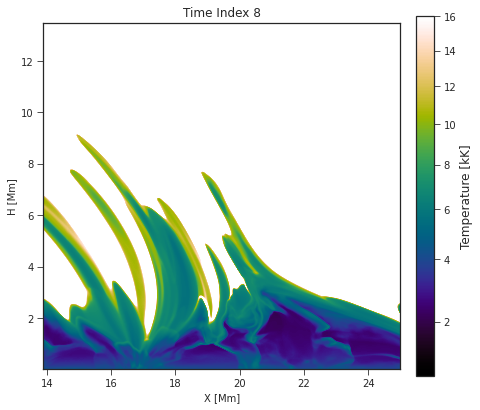

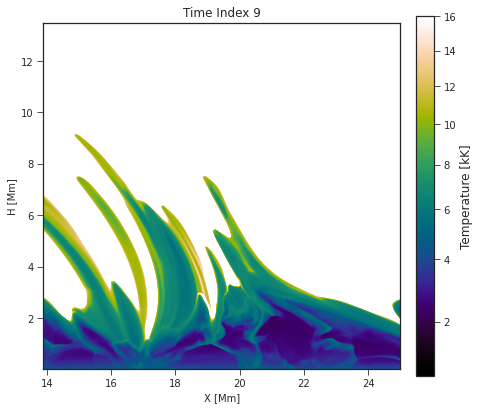

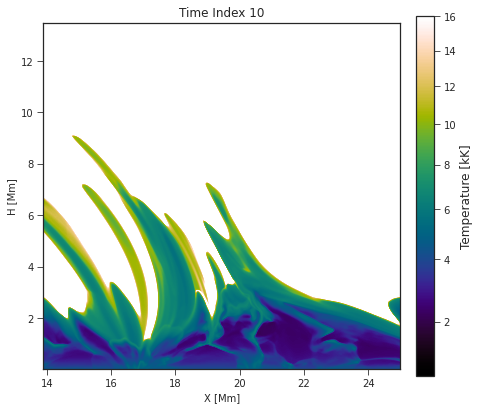

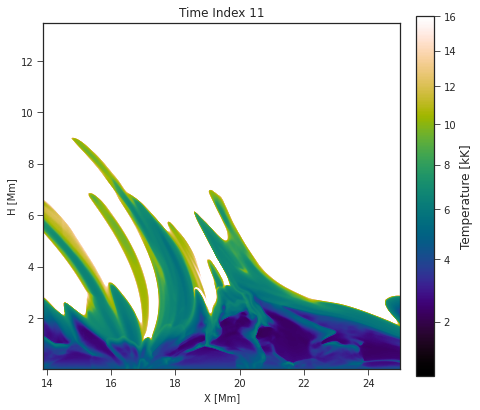

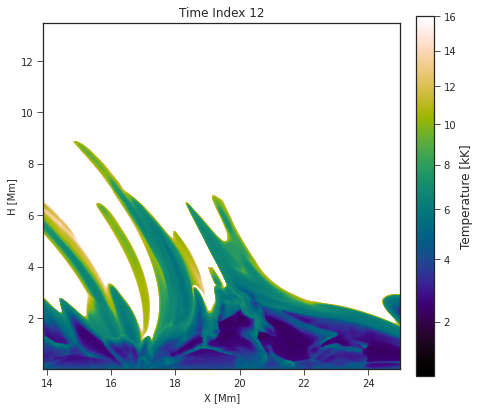

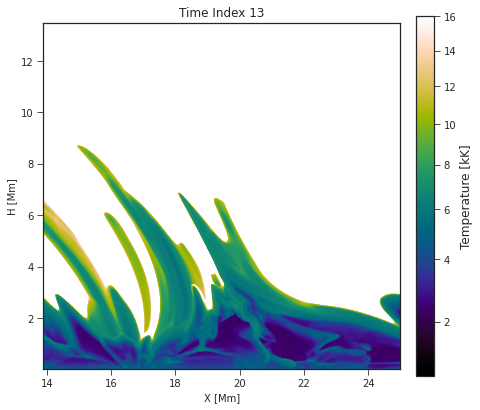

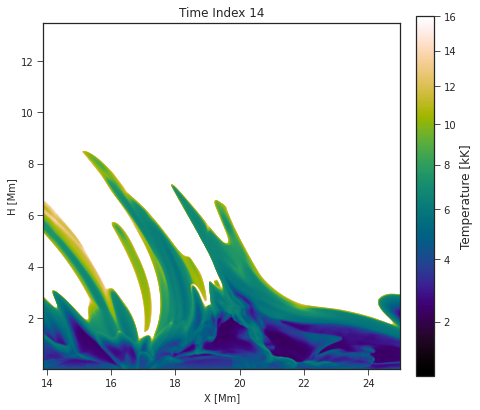

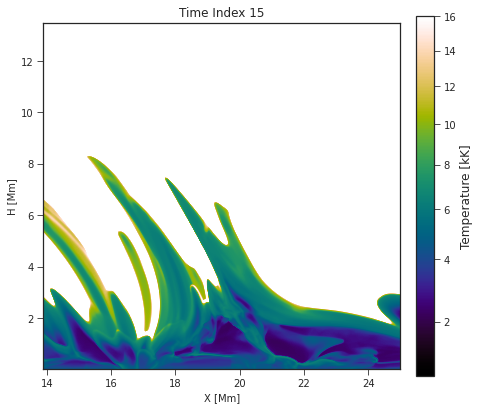

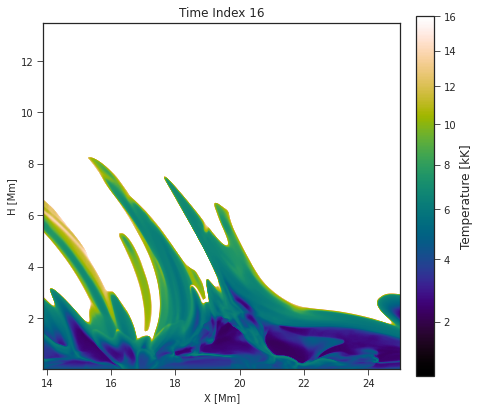

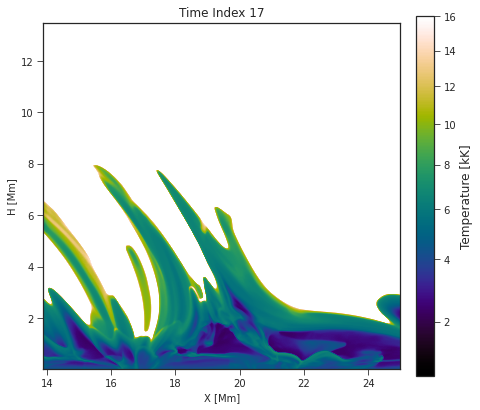

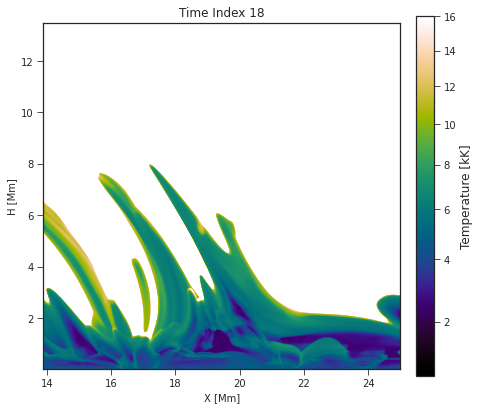

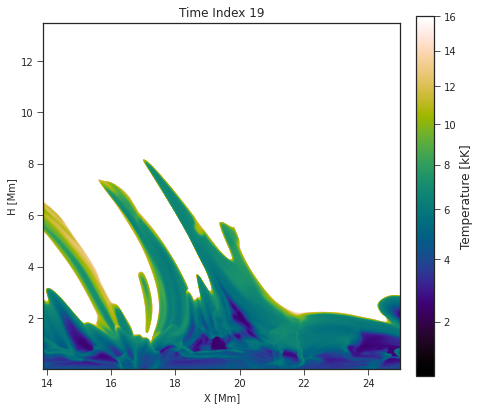

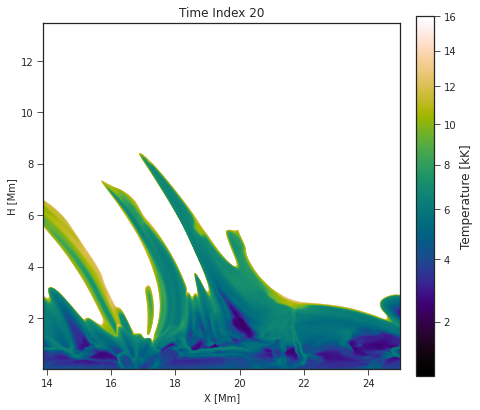

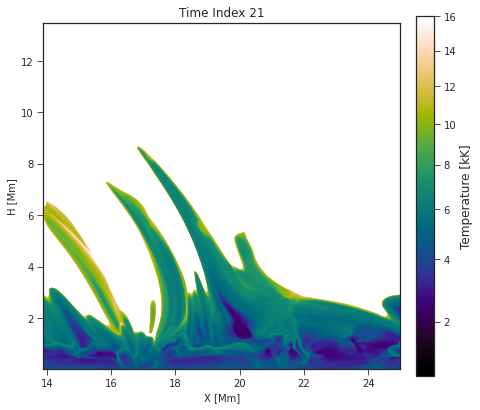

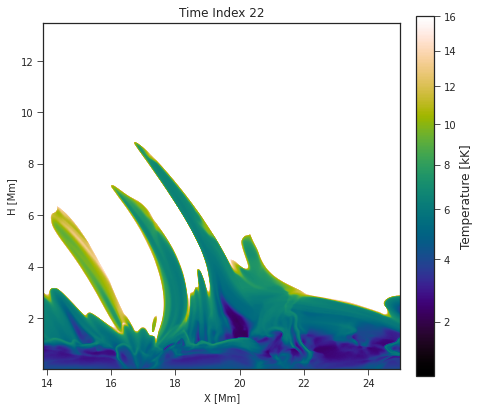

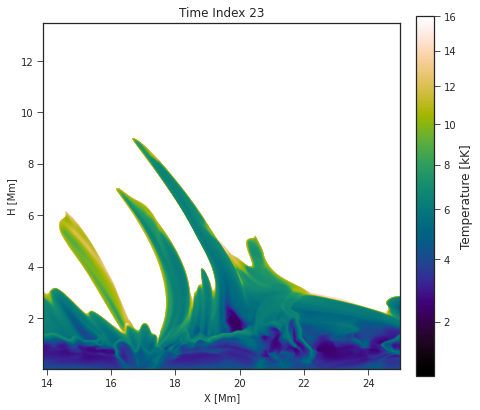

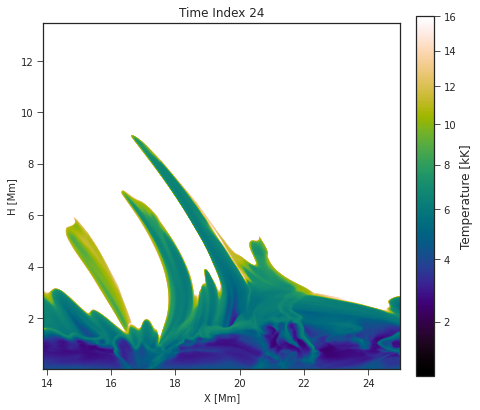

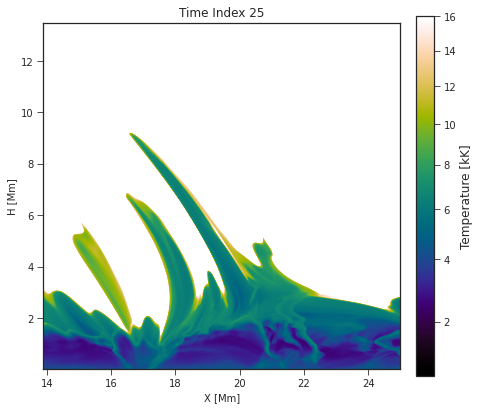

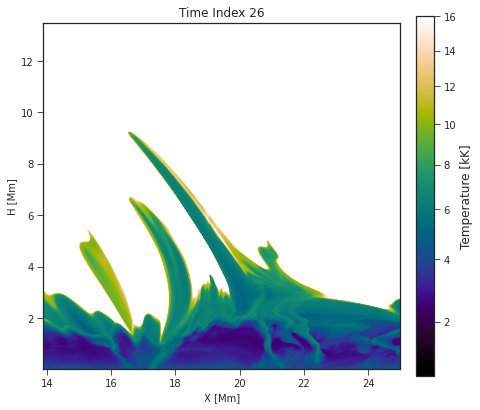

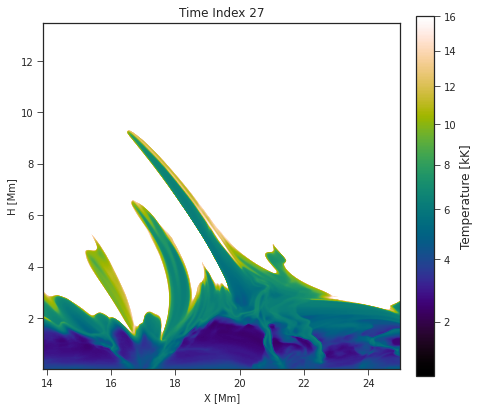

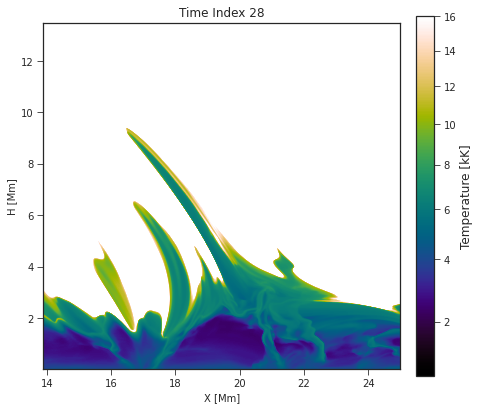

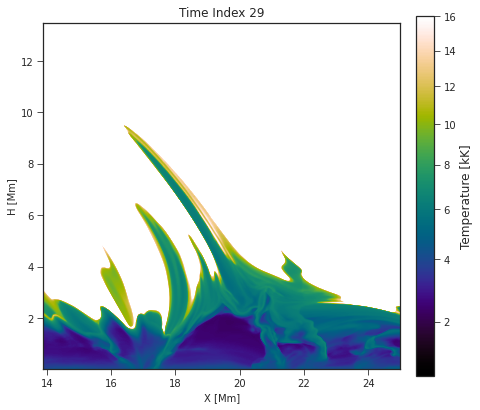

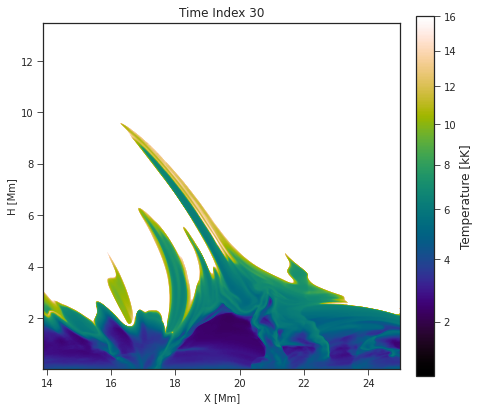

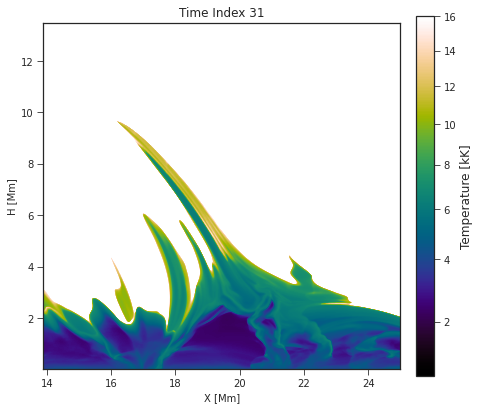

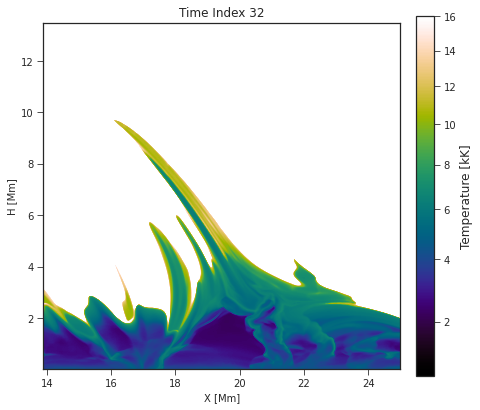

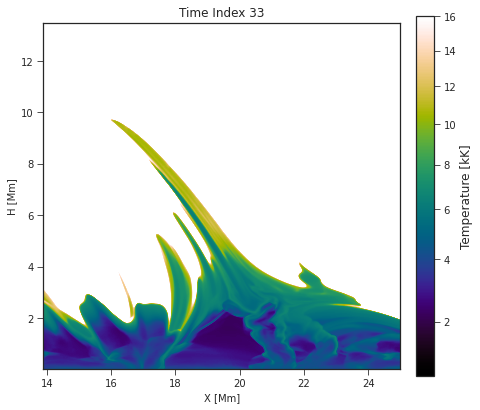

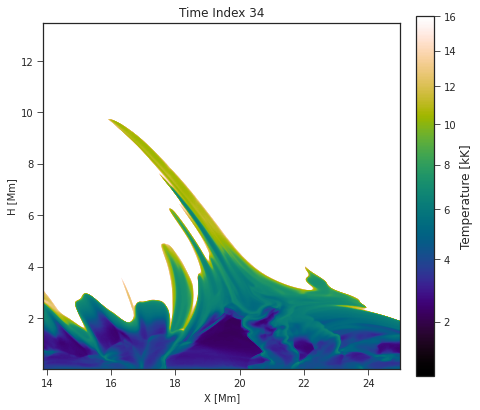

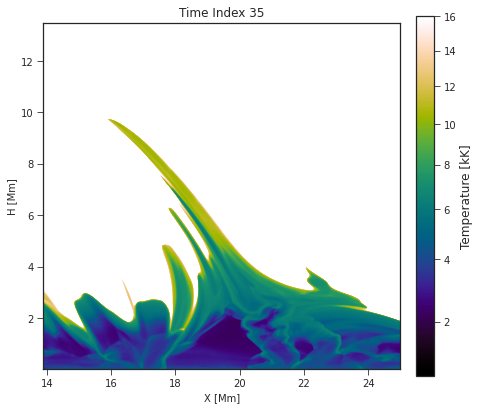

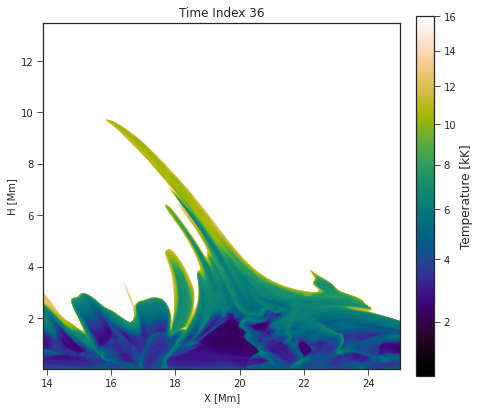

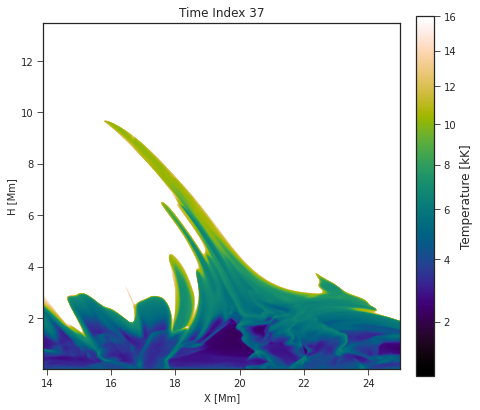

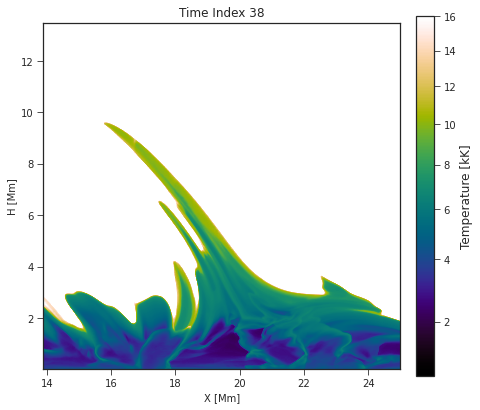

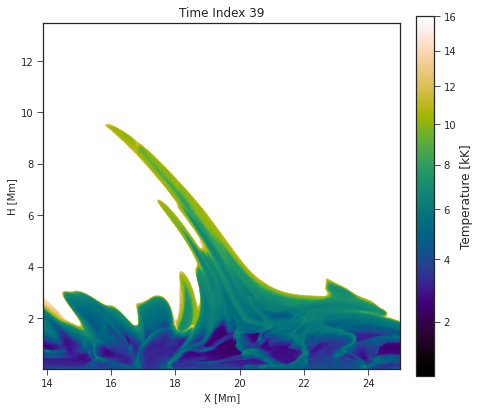

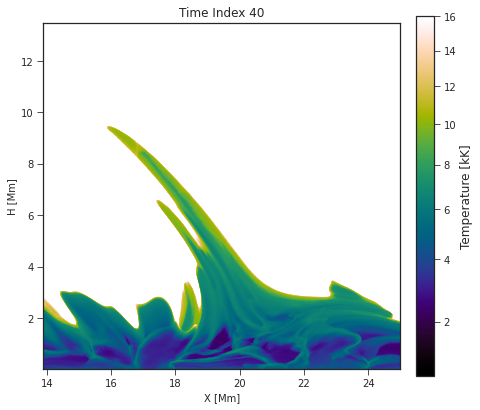

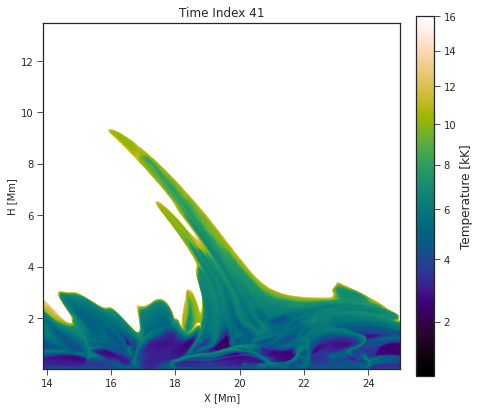

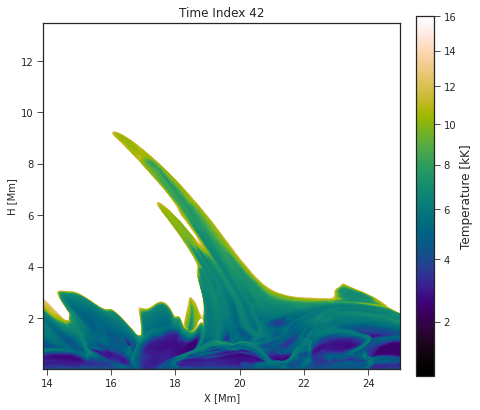

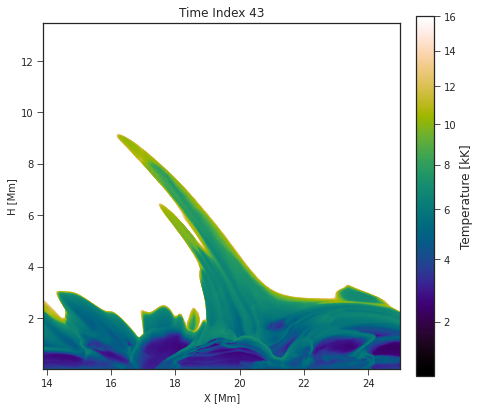

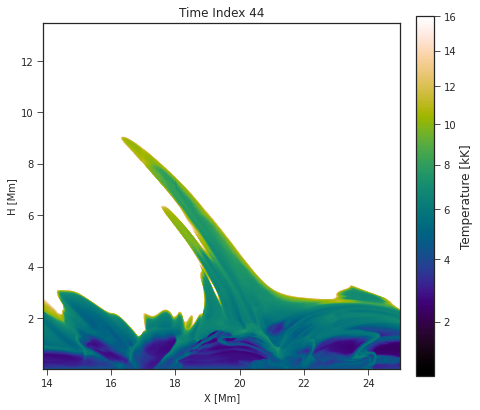

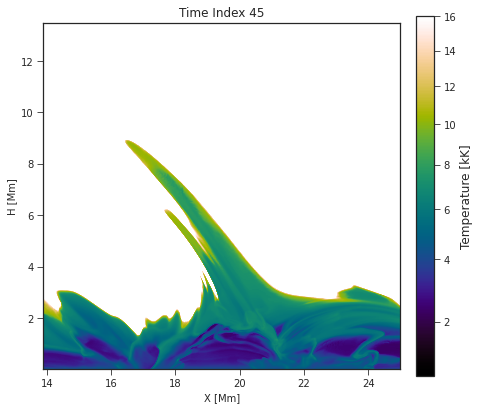

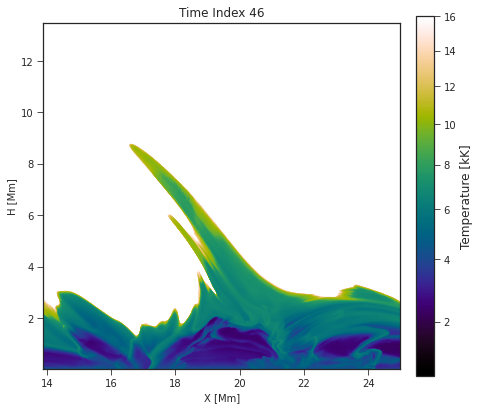

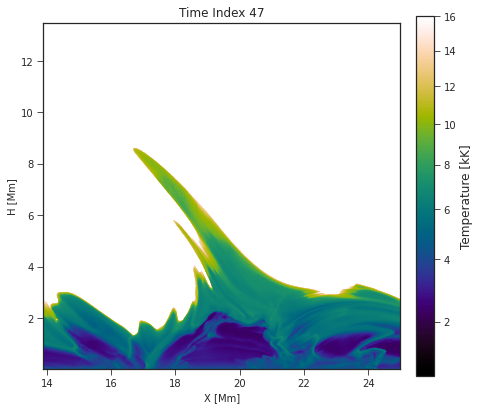

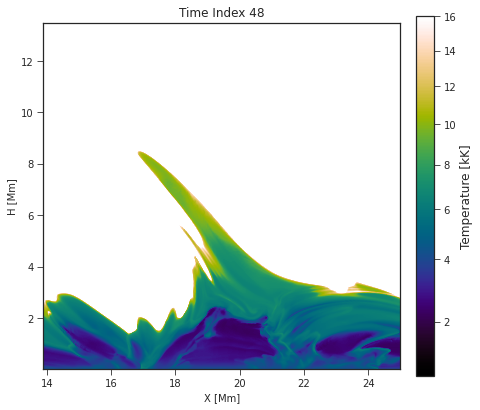

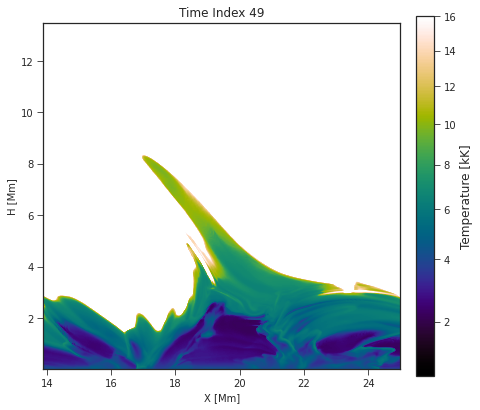

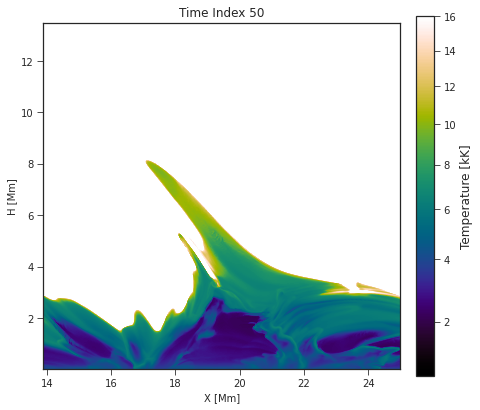

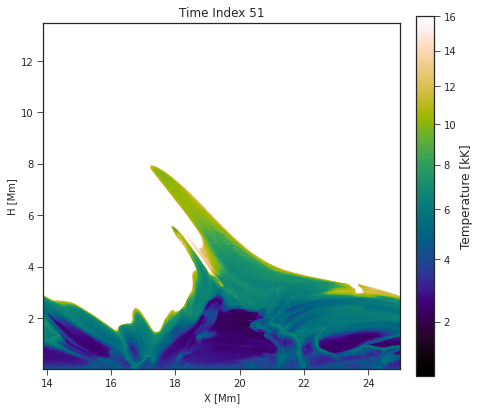

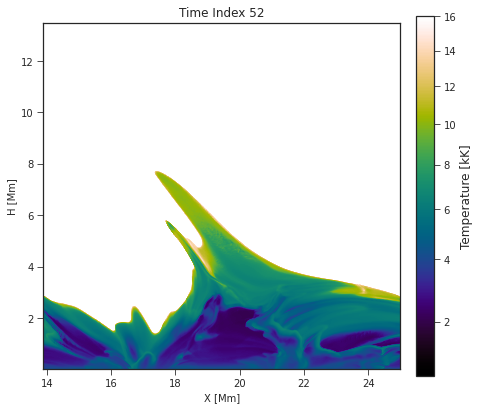

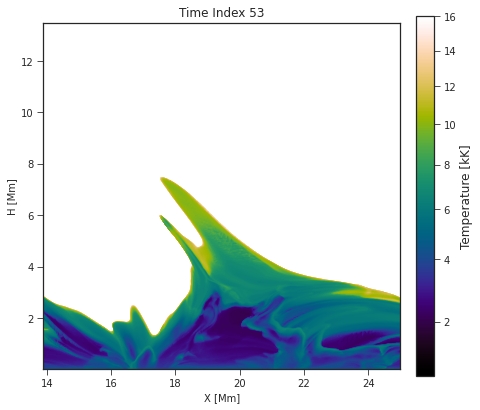

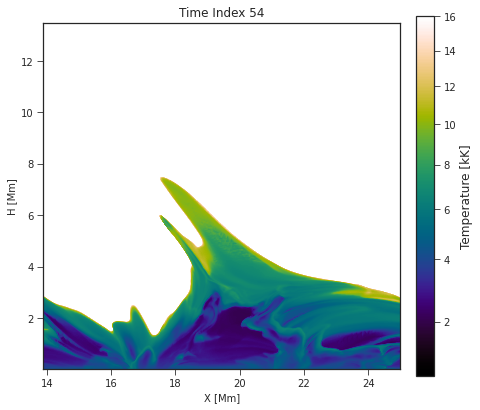

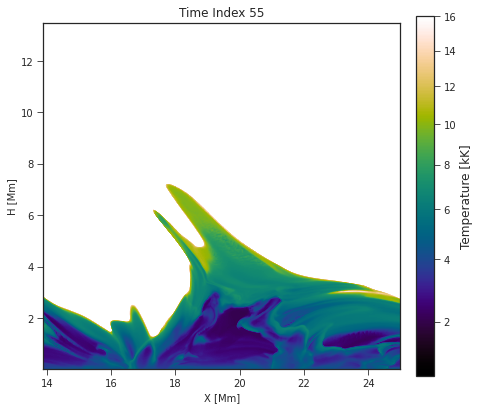

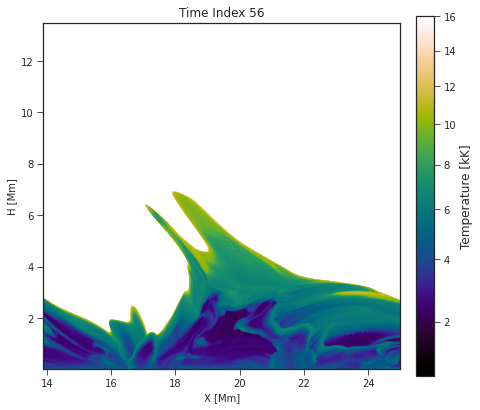

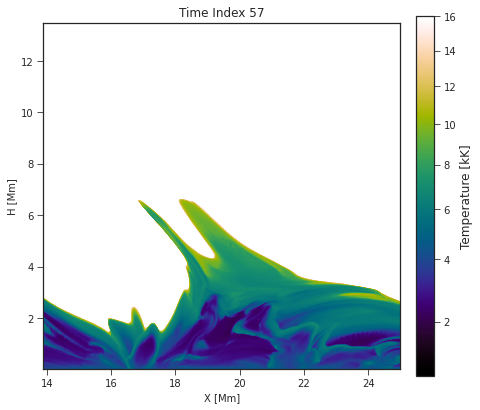

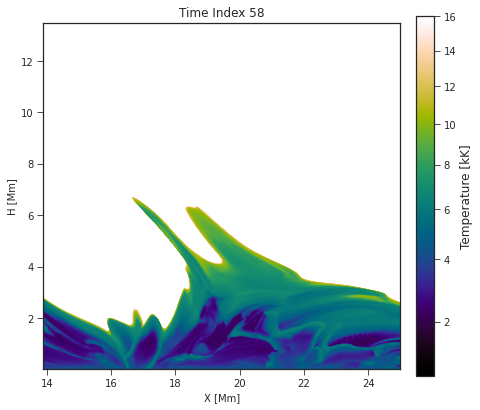

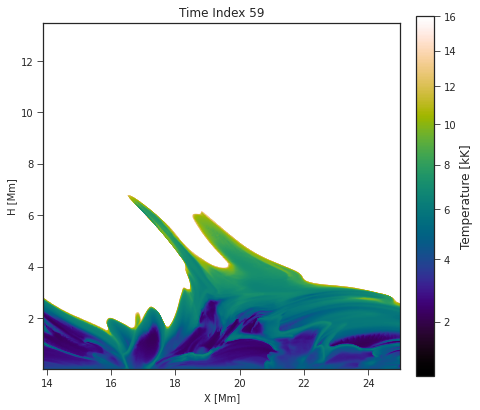

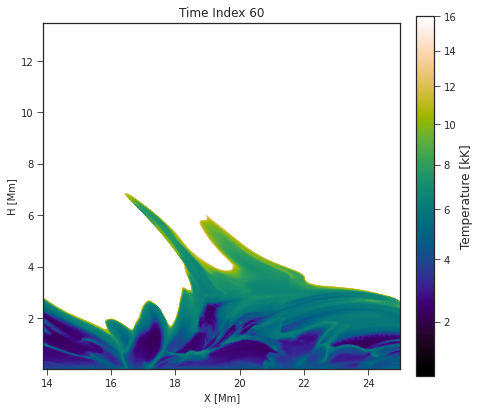

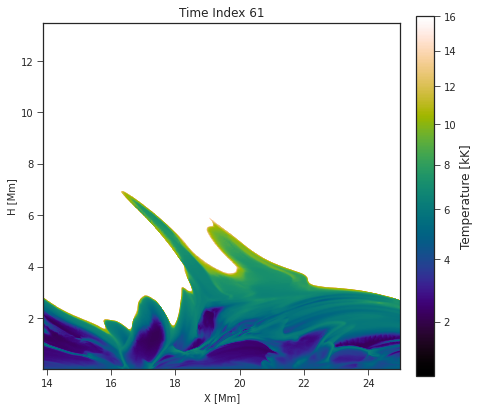

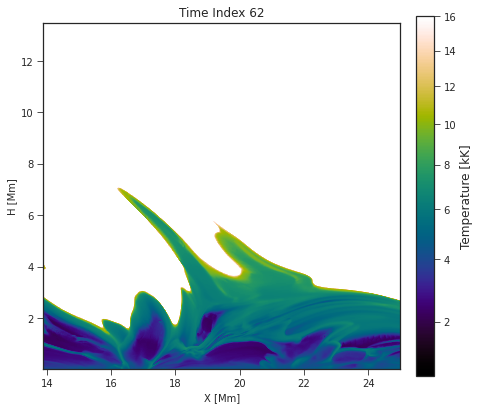

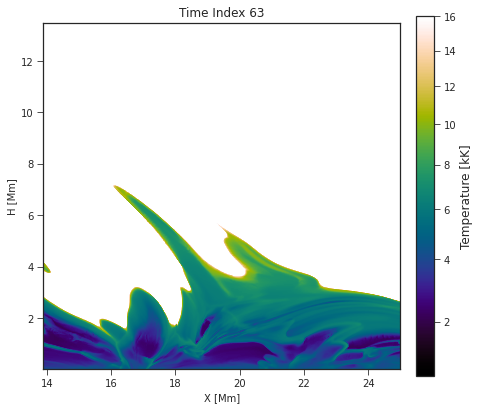

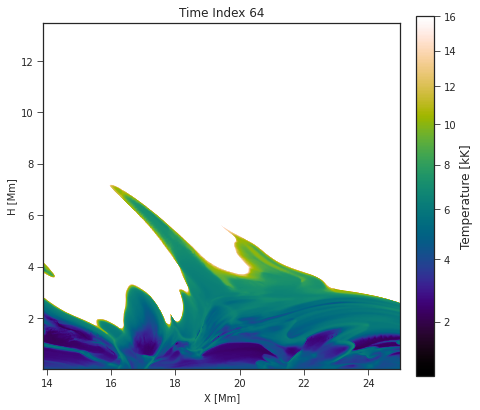

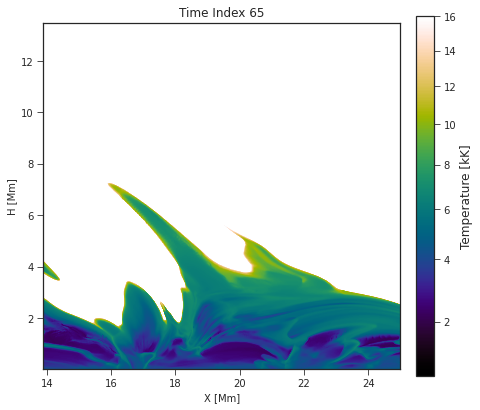

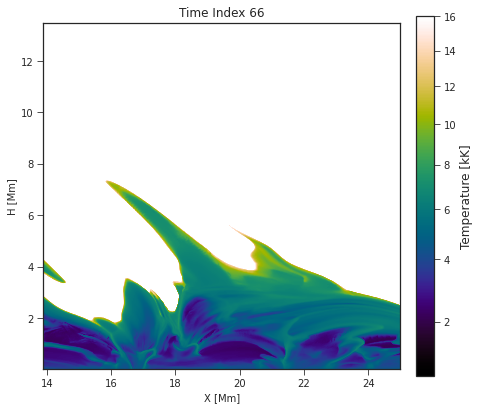

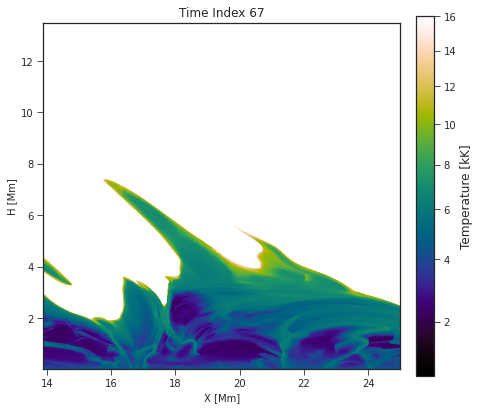

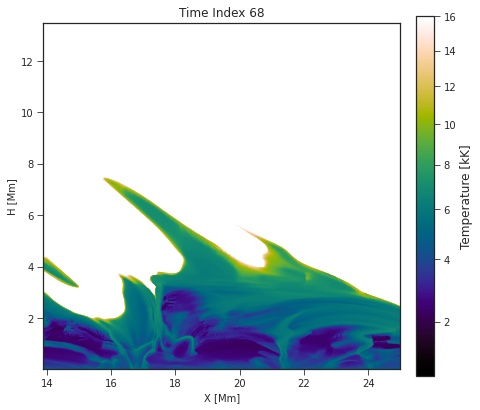

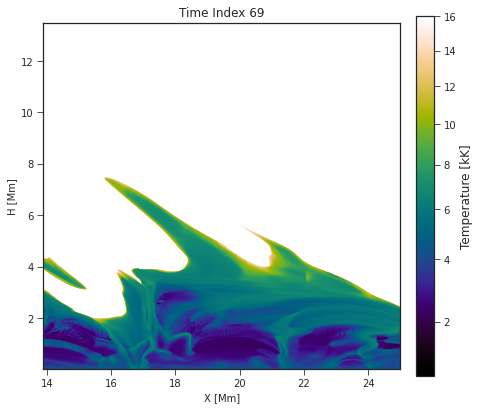

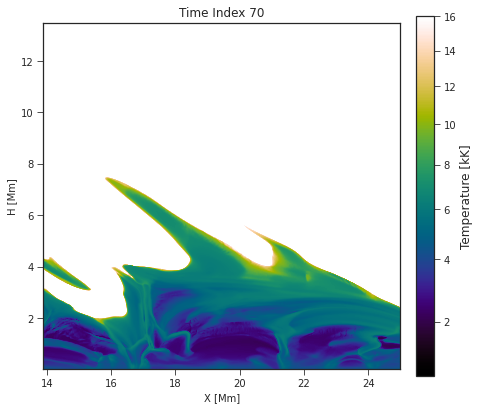

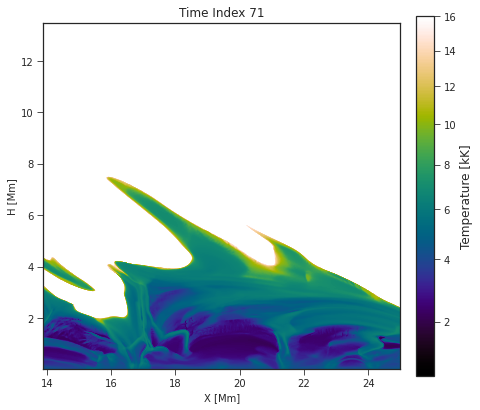

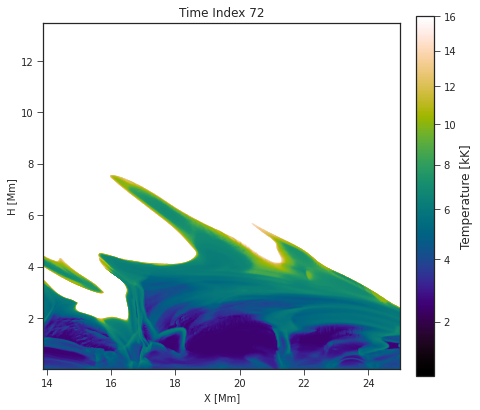

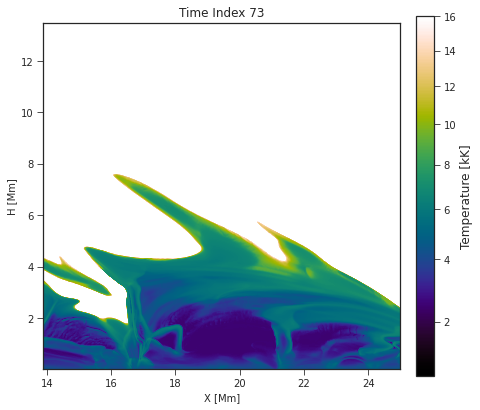

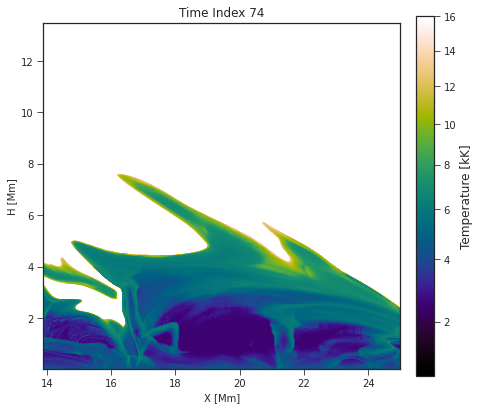

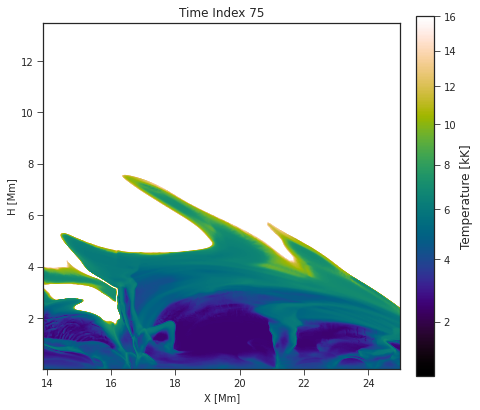

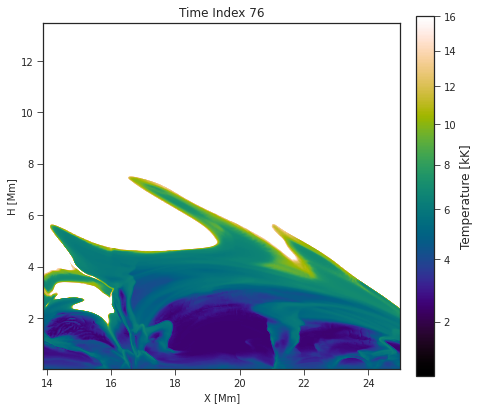

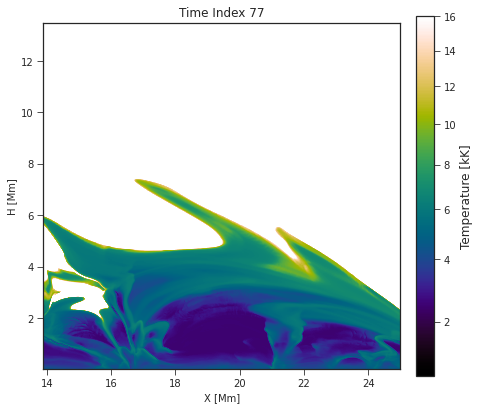

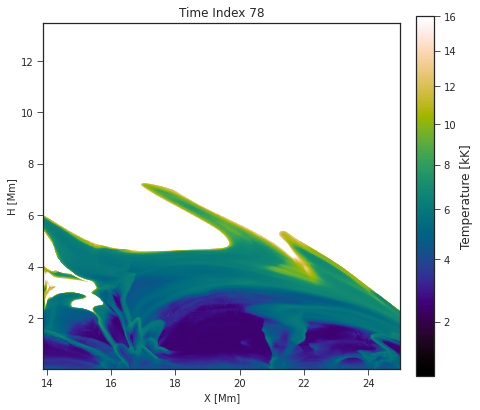

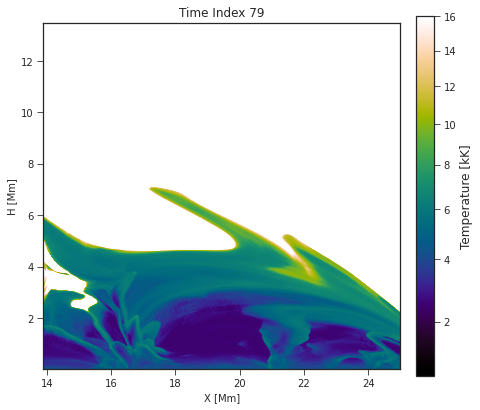

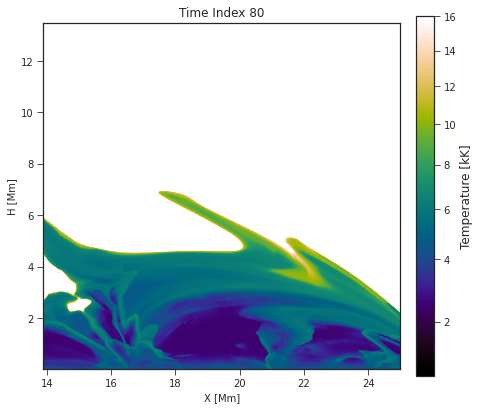

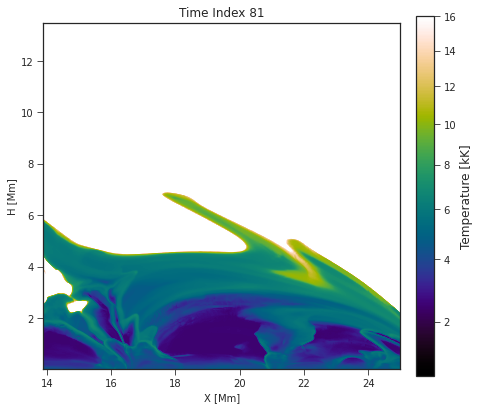

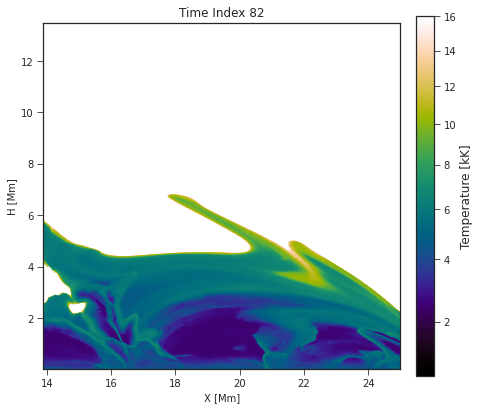

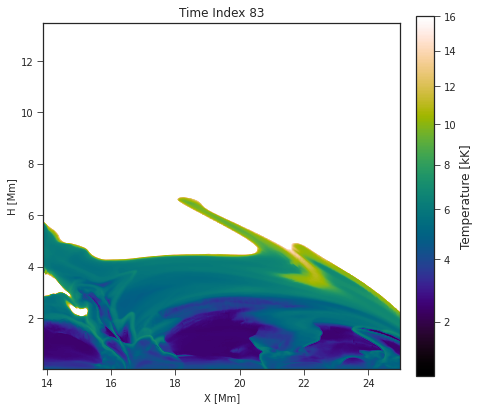

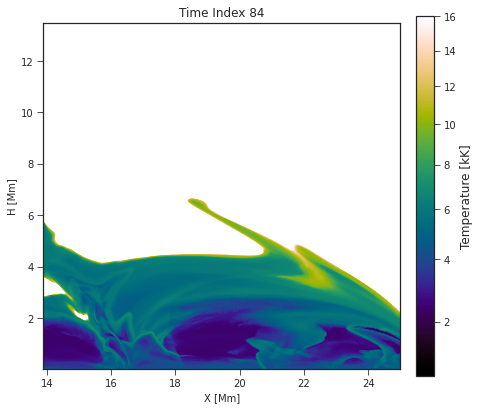

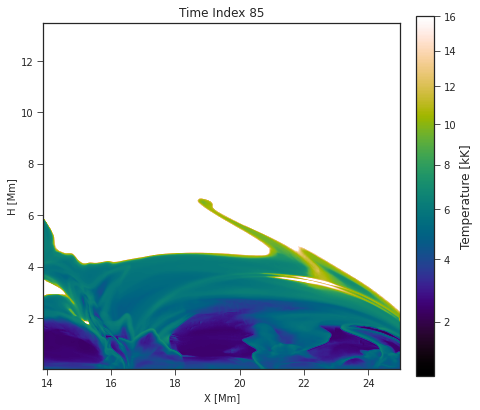

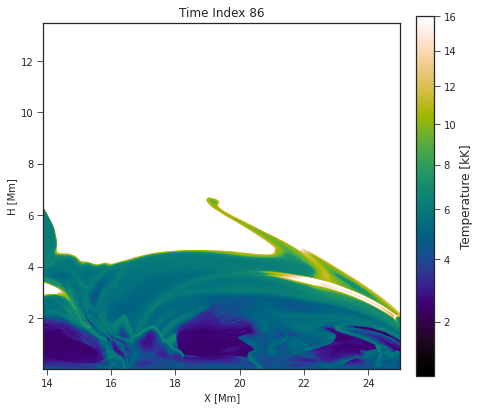

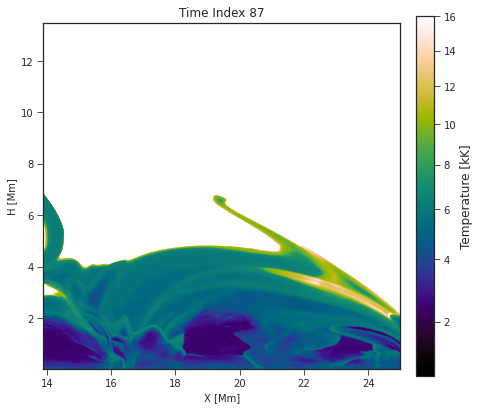

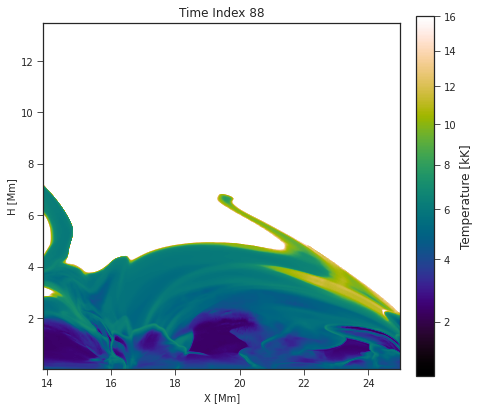

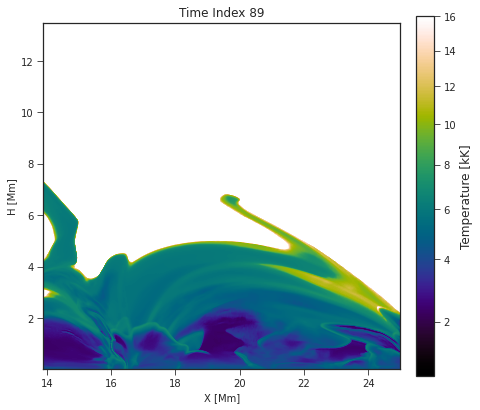

In [65]:
plt.style.use('seaborn-ticks')
for scan in tqdm(range(90)):
    plt.figure(figsize=(7,7))
    im1=plt.imshow((temp_juan[0,1000:1800,scan,500:1410].T)/1e3,cmap=cmr.rainforest,vmax=1.6e4/1e3,vmin=1,norm=colors.PowerNorm(gamma=0.7),aspect=0.8,extent=[x[1000]/1e6,x[1800]/1e6,z1[1410],z1[500]])
    cbar=plt.colorbar(im1,fraction=0.046, pad=0.04)
    cbar.set_label('Temperature [kK]',size=12)
    plt.xlabel('X [Mm]')
    plt.ylabel('H [Mm]')
    plt.title('Time Index '+str(scan))
    #plt.show()
    plt.savefig('/mn/stornext/d9/souvikb/High_impact/Juan_simulation/Temp-'+str(scan)+'.png',dpi=300,orientation='landscape',bbox_inches = 'tight',pad_innches=0.1)
    
    

### So you have to consider the time index from 10--60

/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


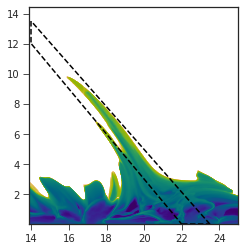

In [95]:
scan=40
point1 = [22.,0.006] #Checking the ROI
point2 = [23.5,0.006]
point3 = [14.0,13.5]
point4 = [14.0,12.]
x_values1 = [point1[0], point2[0]]
y_values1 = [point1[1], point2[1]]

x_values2 =[point2[0],point3[0]]
y_values2 = [point2[1],point3[1]]

x_values3 =[point3[0],point4[0]]
y_values3 = [point3[1],point4[1]]

x_values4 = [point4[0],point1[0]]
y_values4 = [point4[1],point1[1]]


plt.imshow((temp_juan[0,1000:1800,scan,470:1410].T)/1e3,cmap=cmr.rainforest,vmax=1.6e4/1e3,vmin=1,norm=colors.PowerNorm(gamma=0.7),aspect=0.8,extent=[x[1000]/1e6,x[1800]/1e6,z1[1410],z1[470]])
plt.plot(x_values1, y_values1,linestyle='--',color='black')
plt.plot(x_values2, y_values2,linestyle='--',color='black')
plt.plot(x_values3, y_values3,linestyle='--',color='black')
plt.plot(x_values4, y_values4,linestyle='--',color='black')

In [85]:
x[5]/1e3-x[4]/1e3

13.891770000000008

In [87]:
14000/13.9

1007.1942446043165

In [89]:
np.round(22000/13.9)

1583.0

/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


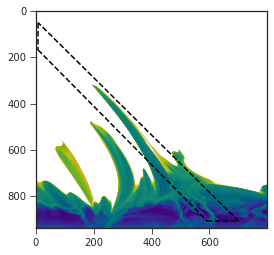

In [168]:
scan=25
point1 = [593.,909] #Checking the ROI
point2 = [701,909]
point3 = [7,150-100]
point4 = [7,268-100]
x_values1 = [point1[0], point2[0]]
y_values1 = [point1[1], point2[1]]

x_values2 =[point2[0],point3[0]]
y_values2 = [point2[1],point3[1]]

x_values3 =[point3[0],point4[0]]
y_values3 = [point3[1],point4[1]]

x_values4 = [point4[0],point1[0]]
y_values4 = [point4[1],point1[1]]


plt.imshow((temp_juan[0,1000:1800,scan,470:1410].T)/1e3,cmap=cmr.rainforest,vmax=1.6e4/1e3,vmin=1,norm=colors.PowerNorm(gamma=0.7),aspect=0.8)
plt.plot(x_values1, y_values1,linestyle='--',color='black')
plt.plot(x_values2, y_values2,linestyle='--',color='black')
plt.plot(x_values3, y_values3,linestyle='--',color='black')
plt.plot(x_values4, y_values4,linestyle='--',color='black')



In [101]:
z1[500]

13.49736

In [106]:
z1[552]

11.99923

In [112]:
np.round(22000/13.9)-1000,np.round(23500/13.9)-1000,np.round(14000/13.9)-1000,np.round(14000/13.9)-1000

(583.0, 691.0, 7.0, 7.0)

## Temperature ROI and space-time

In [200]:
x_slice =[1000,1800]
y_slice =[470,1410]
roi_spicule_temp = np.zeros((x_slice[1]-x_slice[0],y_slice[1]-y_slice[0],90))
for time in tqdm(range(90)):
    nx, ny = 940, 800
    poly_verts =[(940,593),(940,701), (60,0), (178,0)]
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T
    path = Path(poly_verts)
    grid = path.contains_points(points)
    grid = np.array(grid.reshape((ny,nx)))
    roi_spicule_temp[:,:,time]=grid*temp_juan[0,1000:1800,time,470:1410]


100%|██████████| 90/90 [00:24<00:00,  3.69it/s]


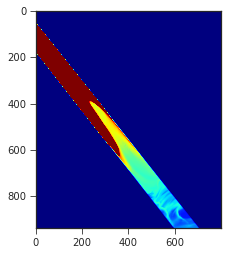

In [201]:
plt.imshow(roi_spicule_temp[:,:,50].T,cmap='jet',vmax=1.6e4)

In [202]:
T_xt_slit = np.mean(roi_spicule_temp,axis=0)

/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  """Entry point for launching an IPython kernel.


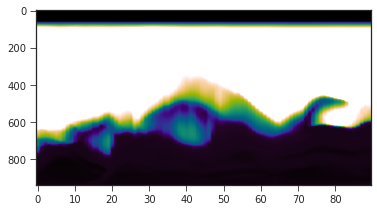

In [206]:
plt.imshow(T_xt_slit[:,:],aspect=0.05,cmap=cmr.rainforest,vmax=3.e4,norm=colors.PowerNorm(gamma=0.7))

In [161]:
grid.shape

(800, 940)

In [162]:
temp_juan[0,1000:1800,time,470:1410].shape

(800, 940)

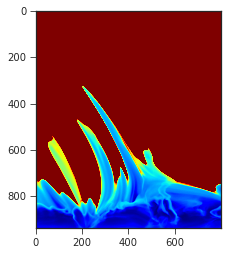

In [187]:
plt.imshow(temp_juan[0,1000:1800,24,470:1410].T,cmap='jet',vmax=1.6e4)